# 1. Who will win the elections? (60pt)

## 1. (2pt) Load data, and do basic sanity checks.

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [35]:
elections = pd.read_csv("../data/us-elections_2000-2020.csv.bz2", sep="\t")
df = pd.read_csv("../data/us-elections_2000-2020.csv.bz2", sep="\t")
print(elections.shape)
elections.head(10)

(37390, 22)


,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
0,1001,2000,Alabama,AL,Autauga,President,Al Gore,democrat,4942.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
1,1001,2000,Alabama,AL,Autauga,President,George W. Bush,republican,11993.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
2,1001,2004,Alabama,AL,Autauga,President,John Kerry,democrat,4758.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
3,1001,2004,Alabama,AL,Autauga,President,George W. Bush,republican,15196.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
4,1001,2008,Alabama,AL,Autauga,President,Barack Obama,democrat,6093.0,23641,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
5,1001,2008,Alabama,AL,Autauga,President,John McCain,republican,17403.0,23641,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
6,1001,2012,Alabama,AL,Autauga,President,Barack Obama,democrat,6363.0,23932,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
7,1001,2012,Alabama,AL,Autauga,President,Mitt Romney,republican,17379.0,23932,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
8,1001,2016,Alabama,AL,Autauga,President,Hillary Clinton,democrat,5936.0,24973,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
9,1001,2016,Alabama,AL,Autauga,President,Donald Trump,republican,18172.0,24973,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south


## 2. (7pt) You are going to work with 2020 data. However, some important information for 2020 is missing. Fill the missings with the most recent values that exist in the data.
### Hint: check out DataFrame.fillna method.

In [ ]:
print(elections.isna().sum())
elections['income'] = elections.groupby('FIPS').income.fillna(method='ffill')
elections['population'] = elections.groupby('FIPS').population.fillna(method='ffill')

FIPS                 0
year                 0
state                0
state2               0
county               0
office               0
candidate            0
party                0
candidatevotes       4
totalvotes           0
income            6762
population        6762
LND010200D           0
EDU695209D           0
EDU600209D           0
POP010210D           0
POP220210D           0
POP250210D           0
POP320210D           0
POP400210D           0
PST110209D           0
region               0
dtype: int64


## 3. (3pt) Ensure you order your observations right and do not fill missings with values from other counties. Print out a few lines before and after filling missings, where you show that you have done this correctly: a) missings are filled with the previous value; and b) it is the previous value for this county, not another county.

In [ ]:
df[['FIPS', 'income', 'population', 'year']]

,FIPS,income,population,year
0,1001,23680.0,44021.0,2000
1,1001,23680.0,44021.0,2000
2,1001,27542.0,48366.0,2004
3,1001,27542.0,48366.0,2004
4,1001,32863.0,53277.0,2008
...,...,...,...,...
37385,56045,42231.0,7077.0,2012
37386,56045,41990.0,7220.0,2016
37387,56045,41990.0,7220.0,2016
37388,56045,NaN,NaN,2020


In [ ]:
elections[['FIPS', 'income', 'population', 'year']]

,FIPS,income,population,year
0,1001,23680.0,44021.0,2000
1,1001,23680.0,44021.0,2000
2,1001,27542.0,48366.0,2004
3,1001,27542.0,48366.0,2004
4,1001,32863.0,53277.0,2008
...,...,...,...,...
37385,56045,42231.0,7077.0,2012
37386,56045,41990.0,7220.0,2016
37387,56045,41990.0,7220.0,2016
37388,56045,41990.0,7220.0,2020


You can see on the last few rows that this is implemented correctly. Orginially, there were NaN for the year 2020 for population and income. Now, the population and income values matches the most recent one for that specific county.

## 4. (3pt) If you did this correctly, then even after filling in NA-s there are a few cases missing. What is going on? Explain!

In [ ]:
elections.isna().sum()

FIPS                0
year                0
state               0
state2              0
county              0
office              0
candidate           0
party               0
candidatevotes      4
totalvotes          0
income            644
population        644
LND010200D          0
EDU695209D          0
EDU600209D          0
POP010210D          0
POP220210D          0
POP250210D          0
POP320210D          0
POP400210D          0
PST110209D          0
region              0
dtype: int64

In [ ]:
print(elections.year.min())
elections[elections['income'].isnull()]

2000


,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
6268,15009,2000,Hawaii,HI,Maui,President,Al Gore,democrat,23484.0,39248,...,2398.74,7777,97531,154834,53336,870,44595,15710,17063,west
6269,15009,2000,Hawaii,HI,Maui,President,George W. Bush,republican,12876.0,39248,...,2398.74,7777,97531,154834,53336,870,44595,15710,17063,west
6270,15009,2004,Hawaii,HI,Maui,President,John Kerry,democrat,28803.0,47430,...,2398.74,7777,97531,154834,53336,870,44595,15710,17063,west
6271,15009,2004,Hawaii,HI,Maui,President,George W. Bush,republican,18187.0,47430,...,2398.74,7777,97531,154834,53336,870,44595,15710,17063,west
6272,15009,2008,Hawaii,HI,Maui,President,Barack Obama,democrat,39727.0,51789,...,2398.74,7777,97531,154834,53336,870,44595,15710,17063,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35117,51840,2012,Virginia,VA,Winchester,President,Mitt Romney,republican,4946.0,10296,...,9.33,2066,17590,26203,19532,2864,611,4041,2737,south
35118,51840,2016,Virginia,VA,Winchester,President,Hillary Clinton,democrat,5164.0,10667,...,9.33,2066,17590,26203,19532,2864,611,4041,2737,south
35119,51840,2016,Virginia,VA,Winchester,President,Donald Trump,republican,4790.0,10667,...,9.33,2066,17590,26203,19532,2864,611,4041,2737,south
35120,51840,2020,Virginia,VA,Winchester city,President,Donald Trump,republican,5221.0,12106,...,9.33,2066,17590,26203,19532,2864,611,4041,2737,south


In [ ]:
elections[elections['population'].isnull()]

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
6268,15009,2000,Hawaii,HI,Maui,President,Al Gore,democrat,23484.0,39248,...,2398.74,7777,97531,154834,53336,870,44595,15710,17063,west
6269,15009,2000,Hawaii,HI,Maui,President,George W. Bush,republican,12876.0,39248,...,2398.74,7777,97531,154834,53336,870,44595,15710,17063,west
6270,15009,2004,Hawaii,HI,Maui,President,John Kerry,democrat,28803.0,47430,...,2398.74,7777,97531,154834,53336,870,44595,15710,17063,west
6271,15009,2004,Hawaii,HI,Maui,President,George W. Bush,republican,18187.0,47430,...,2398.74,7777,97531,154834,53336,870,44595,15710,17063,west
6272,15009,2008,Hawaii,HI,Maui,President,Barack Obama,democrat,39727.0,51789,...,2398.74,7777,97531,154834,53336,870,44595,15710,17063,west
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35117,51840,2012,Virginia,VA,Winchester,President,Mitt Romney,republican,4946.0,10296,...,9.33,2066,17590,26203,19532,2864,611,4041,2737,south
35118,51840,2016,Virginia,VA,Winchester,President,Hillary Clinton,democrat,5164.0,10667,...,9.33,2066,17590,26203,19532,2864,611,4041,2737,south
35119,51840,2016,Virginia,VA,Winchester,President,Donald Trump,republican,4790.0,10667,...,9.33,2066,17590,26203,19532,2864,611,4041,2737,south
35120,51840,2020,Virginia,VA,Winchester city,President,Donald Trump,republican,5221.0,12106,...,9.33,2066,17590,26203,19532,2864,611,4041,2737,south


It might be because there was no previous data for that specific county to have existed. This dataset's earliest year is 2000. The missing values for those counties also started in the year 2000.

## 5. (10pt) Make a new data frame that only contains 2020 data, and that contains a binary variable: the democrats won in that county in 2020.
### Hint: You have to build that variable using two lines of data in the original data frame by FIPS after the data is ordered by year. The orignal data contains two lines for each county, one for democrats and one for republicans. They contain the party-specific number of votes but are otherwise similar. You may extract the rows for democrats, the rows for republicans, and then just compare these two rows county-wise to see who won there. Note that it is not enough to just check if democrats/republicans got more than 50% of votes. However, when you extract the vote numbers, it will be a series with an index. You may want to either reset the index (see examples in Combining data into data frames) or convert the series into a numpy array with the .values attribute.

In [ ]:
election2020 = elections[elections.year == 2020]

dem = election2020[election2020.party == 'democrat'].candidatevotes
rep = election2020[election2020.party == 'republican'].candidatevotes

dem_win = dem.reset_index() > rep.reset_index()
dem_win = dem_win * 1

df_20 = election2020[election2020.party == 'democrat']
df_20 = df_20.drop(['party', 'candidatevotes', 'candidate', 'office'], axis=1)
df_20_dem = df_20.copy()

df_20_dem = df_20_dem.reset_index()

df_20_dem['demwins'] = dem_win.candidatevotes

df_20_dem

,index,FIPS,year,state,state2,county,totalvotes,income,population,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region,demwins
0,11,1001,2020,Alabama,AL,Autauga County,27770,39883.0,55243.0,604.45,2285,31469,54571,42855,9643,474,1310,7085,south,0
1,23,1003,2020,Alabama,AL,Baldwin County,109679,43143.0,207601.0,2026.93,10855,118585,182265,156153,17105,1348,7992,39463,south,0
2,35,1005,2020,Alabama,AL,Barbour County,10518,31932.0,25806.0,904.52,1048,19791,27457,13180,12875,107,1387,699,south,0
3,47,1007,2020,Alabama,AL,Bibb County,9595,28976.0,22586.0,626.16,464,14489,22915,17381,5047,22,406,1698,south,0
4,59,1009,2020,Alabama,AL,Blount County,27588,32902.0,57494.0,650.60,1561,38472,57322,53068,761,117,4626,7323,south,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,37341,56037,2020,Wyoming,WY,Sweetwater County,16603,47486.0,44222.0,10491.17,1145,24430,43806,38748,438,336,6689,3613,west,0
3107,37353,56039,2020,Wyoming,WY,Teton County,14677,205843.0,23234.0,4221.80,2192,14427,21294,18821,49,235,3191,2460,west,1
3108,37365,56041,2020,Wyoming,WY,Uinta County,9402,37731.0,20682.0,2087.56,634,12236,21118,19514,55,61,1855,1185,west,0
3109,37377,56043,2020,Wyoming,WY,Washakie County,4012,43615.0,8165.0,2242.75,430,5152,8533,7795,22,48,1162,-380,west,0


## 6. (10pt) Create auxiliary variables: population density (population divided by land area); and percentage of college graduates. These can be made of different variables, and as none of these are changing fast, it should not have much of an impact.

In [ ]:
df_20_dem['popdens'] = df_20_dem.population / df_20_dem.LND010200D
df_20_dem['perc_college_grad'] = df_20_dem.EDU695209D / df_20_dem.population * 100
df_20_dem

,index,FIPS,year,state,state2,county,totalvotes,income,population,LND010200D,...,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region,demwins,popdens,perc_college_grad
0,11,1001,2020,Alabama,AL,Autauga County,27770,39883.0,55243.0,604.45,...,54571,42855,9643,474,1310,7085,south,0,91.393829,4.136271
1,23,1003,2020,Alabama,AL,Baldwin County,109679,43143.0,207601.0,2026.93,...,182265,156153,17105,1348,7992,39463,south,0,102.421396,5.228780
2,35,1005,2020,Alabama,AL,Barbour County,10518,31932.0,25806.0,904.52,...,27457,13180,12875,107,1387,699,south,0,28.530049,4.061071
3,47,1007,2020,Alabama,AL,Bibb County,9595,28976.0,22586.0,626.16,...,22915,17381,5047,22,406,1698,south,0,36.070653,2.054370
4,59,1009,2020,Alabama,AL,Blount County,27588,32902.0,57494.0,650.60,...,57322,53068,761,117,4626,7323,south,0,88.370735,2.715066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,37341,56037,2020,Wyoming,WY,Sweetwater County,16603,47486.0,44222.0,10491.17,...,43806,38748,438,336,6689,3613,west,0,4.215164,2.589209
3107,37353,56039,2020,Wyoming,WY,Teton County,14677,205843.0,23234.0,4221.80,...,21294,18821,49,235,3191,2460,west,1,5.503340,9.434450
3108,37365,56041,2020,Wyoming,WY,Uinta County,9402,37731.0,20682.0,2087.56,...,21118,19514,55,61,1855,1185,west,0,9.907260,3.065468
3109,37377,56043,2020,Wyoming,WY,Washakie County,4012,43615.0,8165.0,2242.75,...,8533,7795,22,48,1162,-380,west,0,3.640620,5.266381


## 7. (2pt) Ensure that the variables you are going to use are in a reasonable range!
### Hint: there are values that do not make sense. Use min and max to check to find such values and remove those.

In [ ]:
df_20_dem.min()

index                              11
FIPS                             1001
year                             2020
state                         Alabama
state2                             AL
county               Abbeville County
totalvotes                         66
income                        18183.0
population                      117.0
LND010200D                        0.0
EDU695209D                          0
EDU600209D                         77
POP010210D                         82
POP220210D                         65
POP250210D                          0
POP320210D                          0
POP400210D                          0
PST110209D                    -135313
region                        midwest
demwins                             0
popdens                       0.17286
perc_college_grad                 0.0
dtype: object

In [ ]:
df_20_dem.max()

index                         37389
FIPS                          56045
year                           2020
state                       Wyoming
state2                           WY
county               Ziebach County
totalvotes                  4263443
income                     205843.0
population               10105708.0
LND010200D                 20105.32
EDU695209D                   608186
EDU600209D                  6266988
POP010210D                  9818605
POP220210D                  4936599
POP250210D                  1287767
POP320210D                  1346865
POP400210D                  4687889
PST110209D                   950964
region                         west
demwins                           1
popdens                         inf
perc_college_grad         26.305673
dtype: object

In [ ]:
df_20_dem.isna().sum()

index                 0
FIPS                  0
year                  0
state                 0
state2                0
county                0
totalvotes            0
income               52
population           52
LND010200D            0
EDU695209D            0
EDU600209D            0
POP010210D            0
POP220210D            0
POP250210D            0
POP320210D            0
POP400210D            0
PST110209D            0
region                0
demwins               0
popdens              52
perc_college_grad    52
dtype: int64

In [ ]:
df_20_dem[df_20_dem['popdens'].isnull()]
df_20_dem = df_20_dem.dropna()
df_20_dem.isna().sum() #no NaNs

index                0
FIPS                 0
year                 0
state                0
state2               0
county               0
totalvotes           0
income               0
population           0
LND010200D           0
EDU695209D           0
EDU600209D           0
POP010210D           0
POP220210D           0
POP250210D           0
POP320210D           0
POP400210D           0
PST110209D           0
region               0
demwins              0
popdens              0
perc_college_grad    0
dtype: int64

In [ ]:
df_20_dem = df_20_dem[df_20_dem.LND010200D > 0]
df_20_dem = df_20_dem[df_20_dem.EDU695209D > 0]

df_20_dem.min(), df_20_dem.max()

(index                              11
 FIPS                             1001
 year                             2020
 state                         Alabama
 state2                             AL
 county               Abbeville County
 totalvotes                         66
 income                        18183.0
 population                      117.0
 LND010200D                      15.41
 EDU695209D                          4
 EDU600209D                         77
 POP010210D                         82
 POP220210D                         65
 POP250210D                          0
 POP320210D                          0
 POP400210D                          0
 PST110209D                    -135313
 region                        midwest
 demwins                             0
 popdens                       0.17286
 perc_college_grad            0.223658
 dtype: object,
 index                         37389
 FIPS                          56045
 year                           2020
 state         

I saw that there were a few NA values in the dataset and decided to drop them. Then, using the .min() function, I saw that the minimum land area and those who obtained a bachelor's degree between 2005-2009 was 0. This does not make any sense, so I filtered my dataset to be all rows where the land and those who obtained bachelor's degree between 2005-2009 is greater than 0. I checked again with the .min() and .max() function and saw that the numbers looked reasonable.

## 8. (10pt) Estimate logistic regression model where you explain democrats’ winning with population density, education level, income, and census region.

In [ ]:
m = smf.logit('demwins ~ popdens + perc_college_grad + income + C(region)', data=df_20_dem).fit()

Optimization terminated successfully.
         Current function value: 0.305816
         Iterations 8


In [ ]:
m.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                demwins
Method:                          dydx
At:                           overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(region)[T.northeast]     0.0854      0.020      4.215      0.000       0.046       0.125
C(region)[T.south]         0.0555      0.015      3.793      0.000       0.027       0.084
C(region)[T.west]          0.1388      0.016      8.420      0.000       0.106       0.171
popdens                    0.0002   2.32e-05     10.675      0.000       0.000       0.000
perc_college_grad          0.0461      0.003     13.646      0.000       0.039       0.053
income                 -3.223e-06   7.06e-07     -4.566      0.000   -4.61e-06   -1.84e-06
==========================================================================================
"""

## 9. (13pt) Interpret the results. Which results are statistically significant?
### Note: you may want to change some of the units, e.g. you may want to measure population density in 1000/per sq mi, instead of persons per sq mi.

In [51]:
df_20_dem.popdens = df_20_dem.population/1000 / df_20_dem.LND010200D #1000/sq mi
m = smf.logit('demwins ~ popdens + perc_college_grad + income + C(region)', data=df_20_dem).fit()
m.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.305816
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                demwins
Method:                          dydx
At:                           overall
==========================================================================================
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(region)[T.northeast]     0.0854      0.020      4.215      0.000       0.046       0.125
C(region)[T.south]         0.0555      0.015      3.793      0.000       0.027       0.084
C(region)[T.west]          0.1388      0.016      8.420      0.000       0.106       0.171
popdens                    0.2476      0.023     10.675      0.000       0.202       0.293
perc_college_grad          0.0461      0.003     13.646      0.000       0.039       0.053
income                 -3.223e-06   7.06e-07     -4.566      0.000   -4.61e-06   -1.84e-06
==========================================================================================
"""

Interpretation:
* percentage college graduated: for every time a person graduates colllege, there is a 4.6% chance in democrats winning, given the other variables stays constant
* income: for each dollar earned, there little to no increase, given the other variables stays constant
* population density: for each 1000 people increase in a given population, they are 24.76% higher to vote for democrats
* northeast: those in the northeastern part of the US are 8.5% more likely to vote for democrats, given the other , given the other variables stays constant
* south: those in the southern part of the US are 5.6% more likely to vote for democrats, given the other variables stays constant
* west: those in the west are 13.9% more likely to vote for democrats, given the other variables stays constant

All the tests are statistically significant:
* The population density is statistically significant because $H0:0$ is outside of the confidence interval. Also, the p-value is less than the significant level. These 2 observations means that we reject $H0$
* The results for the regions are statistically significant because the $H0: 0$, is not in the confidence interval and the p-value is less than the significant level, meaning we should reject it. 
* For the result of the income, the confidence interval is pretty close to $H0$, even though $H0$ is not in it. So although we can reject $H0$ and say that the test is statistically significant, I think we should keep an eye out for this value variable. The p-value is also less than the significant level, meaning we should reject $H0$, and thus, this test is also statistically significant.
* $H0$ for the percentage of college graduates is also no within the confidence interval, and the p-value is less than significant level, meaning we reject $H0$

# 2. Model AirBnB Price (40pt)
## 1. (2pt) Load data. Select only relevant variables you need below. Even better, check out the usecols argument for read_csv. Do basic checks.

In [68]:
airbnb = pd.read_csv('../data/airbnb-beijing-listings.csv.bz2', usecols=['price', 'bedrooms', 'accommodates', 'bathrooms', 'room_type'])
print(airbnb.head())
airbnb.shape

         room_type  accommodates  bathrooms  bedrooms      price
0  Entire home/apt             9        2.0       3.0    $831.00
1     Private room             2        1.0       1.0  $1,197.00
2  Entire home/apt             2        1.0       1.0    $598.00
3  Entire home/apt             2        1.0       1.0    $598.00
4  Entire home/apt             2        1.0       1.0    $598.00


(38814, 5)

## 2. (5pt) Do the basic data cleaning:
### (a) convert price to numeric.

In [69]:
airbnb['price'] = airbnb['price'].str.replace('$', '')
airbnb['price'] = airbnb['price'].str.replace(',', '')

airbnb.price = pd.to_numeric(airbnb.price, errors='coerce')

/tmp/ipykernel_216/1992239947.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb['price'] = airbnb['price'].str.replace('$', '')


I used the following linnk to help me get rid of the dollar signs in the price column: https://pbpython.com/currency-cleanup.html

### (b) remove entries with missing or invalid price, bedrooms, and other variables you need below

In [70]:
airbnb = airbnb.dropna()
airbnb.shape


(38695, 5)

## 3. (4pt) Analyze the distribution of price. Does it look like normal? Does it look like something else? Does it suggest you should do a log-transformation?
### Hint: consult lecture notes Section 4.1.8 Interactions and Feature Transformations.

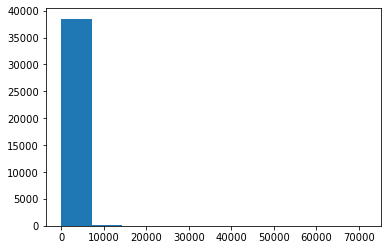

In [71]:
_ = plt.hist(airbnb.price)

In [72]:
airbnb = airbnb[airbnb.price > 0]

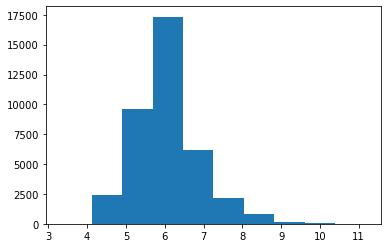

In [73]:
_ = plt.hist(np.log(airbnb.price))

The original histogram defintely needed to be logged because it only showed a tall, vertical line. When it is log-transformed, it looks a little more normal and symmetric than before. However, it is not normal nor symmetric, but it is skewed right.

## 4. (6pt) Convert the number of bedrooms into another variable with a limited number of categories only, such as 0, 1, 2, 3, 4+, and use these categories in the models below.
### Hint: consult the python notes https://faculty.washington.edu/otoomet/machinelearning-py/cleaning-data.html

In [74]:
airbnb['bedrooms'].astype(float)
airbnb['bedrooms'] = np.where(airbnb.bedrooms >= 4, '4+', airbnb.bedrooms).astype(str)
airbnb['bedrooms'] = np.where(airbnb.bedrooms == 1, '1', airbnb.bedrooms).astype(str)
airbnb['bedrooms'] = np.where(airbnb.bedrooms == 2, '2', airbnb.bedrooms).astype(str)
airbnb['bedrooms'] = np.where(airbnb.bedrooms == 3, '3', airbnb.bedrooms).astype(str)

## 5. (6pt) Run a linear regression where you explain the listing price with number of bedrooms where bedrooms uses these categories. Interpret the results, including $R^2$.
### Hint: if 0-BR is the reference category, the effect for 1BR should be -11.62 (but it depends on how exactly did you clean data).

In [75]:
m = smf.ols('price ~ bedrooms', data=airbnb).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1093.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        08:33:28   Log-Likelihood:            -3.4133e+05
No. Observations:               38686   AIC:                         6.827e+05
Df Residuals:                   38681   BIC:                         6.827e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         448.8851    107.166      4.189      0.000     238.837     658.933
bedrooms[T.1.0]   -11.6223    107.655     -0.108      0.914    -222.628     199.384
bedrooms[T.2.0]   295.9590    108.801      2.720      0.007      82.705     509.213
bedrooms[T.3.0]   746.0202    111.966      6.663      0.000     526.565     965.476
bedrooms[T.4+]   2167.8388    111.995     19.357      0.000    1948.326    2387.352
==============================================================================
Omnibus:                    95843.461   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1539629661.103
Skew:                          26.864   Prob(JB):                         0.00
Kurtosis:                     978.842   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:
* Intercept: 448.89 is how much a 0BR airbnb costs in Beijing.
* 1BR: A 1BR airbnb is about \$11.62 on average, cheaper than a 0BR airbnb.
* 2BR: A 2BR airbnb is about \$296 on average, more expensive than a 0BR airbnb.
* 3BR: A 3BR airbnb is about \$746 on average, more expensive than a 0BR airbnb.
* 4B+: A 4BR+ airbnb is about \$2167.84, on average, more expensive than a 0BR airbnb.
* $R^2$: $R^2$=0.102. This means that around 10.2% of the variation in the data can be explained by this model.

## 6. (8pt) Now repeat the process with the model where you analyze log price instead of price. Interpret the results. Which model behaves better in the sense of $R^2$?
### Hint: if you cleaned the data the same way as me, you should see $R^2$ = 0.32. For the following task use either log(price) or price, depending on your answer here.

In [76]:
airbnb['log_price'] = np.log(airbnb.price)
airbnb.head()


,room_type,accommodates,bathrooms,bedrooms,price,log_price
0,Entire home/apt,9,2.0,3.0,831.0,6.722630
1,Private room,2,1.0,1.0,1197.0,7.087574
2,Entire home/apt,2,1.0,1.0,598.0,6.393591
3,Entire home/apt,2,1.0,1.0,598.0,6.393591
4,Entire home/apt,2,1.0,1.0,598.0,6.393591


In [77]:
m = smf.ols('log_price ~ bedrooms', data=airbnb).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     4562.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        08:33:32   Log-Likelihood:                -40076.
No. Observations:               38686   AIC:                         8.016e+04
Df Residuals:                   38681   BIC:                         8.020e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.8117      0.044    130.662      0.000       5.724       5.899
bedrooms[T.1.0]    -0.0323      0.045     -0.724      0.469      -0.120       0.055
bedrooms[T.2.0]     0.5306      0.045     11.749      0.000       0.442       0.619
bedrooms[T.3.0]     0.9396      0.046     20.219      0.000       0.848       1.031
bedrooms[T.4+]      1.5931      0.046     34.272      0.000       1.502       1.684
==============================================================================
Omnibus:                     3876.704   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16891.857
Skew:                           0.418   Prob(JB):                         0.00
Kurtosis:                       6.128   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:
* Intercept: a log price of 5.8 is how much a 0BR airbnb costs in Beijing.
* 1BR: A 1BR airbnb is, on average, about 3% cheaper than a 0BR airbnb.
* 2BR: A 2BR airbnb is, on average, about 53% more expensive than a 0BR airbnb.
* 3BR: A 3BR airbnb is, on average, about 94% more expensive than a 0BR airbnb.
* 4B+: A 4BR+ airbnb is, on average, about 160% more expensive than a 0BR airbnb.
* $R^2$: $R^2$=0.321. This means that around 32.1% of the variation in the data can be explained by this model. This number is better than the previous model

## 7. (9pt) Finally we just add three more variables to the model: room type, accommodates, and bathrooms. While room type only contains three values, the other two contain many different categories. Recode these as
* accommodates: “1”, “2”, “3”, “4 and more”
* bathrooms: “0”, “1”, “2”, “3 and more”, where the 0.5 is rounded up to the next integer, e.g. 0.5 becomes 1, and 1.5 becomes 2.
## Run this model. Interpret and comment the more interesting/important results. Do not forget to mention what are the relevant reference categories and $R^2$.


In [78]:
airbnb['accommodates'].astype(float)
airbnb['accommodates'] = np.where(airbnb.accommodates >= 4, '4 and more', airbnb.accommodates).astype(str)
airbnb['accommodates'] = np.where(airbnb.accommodates == 1, '1', airbnb.accommodates).astype(str)
airbnb['accommodates'] = np.where(airbnb.accommodates == 2, '2', airbnb.accommodates).astype(str)
airbnb['accommodates'] = np.where(airbnb.accommodates == 3, '3', airbnb.accommodates).astype(str)

In [100]:
airbnb.bathrooms = airbnb['bathrooms'].astype(float)
airbnb['rounded_bath'] = np.ceil(airbnb.bathrooms) #rounded all the .5 bathrooms up
airbnb['bathrooms_str'] = np.where(airbnb.rounded_bath == 0, '0', airbnb.rounded_bath).astype(str)
airbnb['bathrooms_str'] = np.where(airbnb.rounded_bath == 1, '1', airbnb.rounded_bath).astype(str)
airbnb['bathrooms_str'] = np.where(airbnb.rounded_bath == 2, '2', airbnb.rounded_bath).astype(str)
airbnb['bathrooms_str'] = np.where(airbnb.rounded_bath >= 3, '3 and more', airbnb.rounded_bath).astype(str)

In [101]:
m = smf.ols('log_price ~ bedrooms + accommodates + bathrooms_str + room_type', data=airbnb).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     2709.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        08:43:20   Log-Likelihood:                -35751.
No. Observations:               38686   AIC:                         7.153e+04
Df Residuals:                   38673   BIC:                         7.164e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       5.5770      0.062     90.051      0.000       5.456       5.698
bedrooms[T.1.0]                 0.0558      0.040      1.395      0.163      -0.023       0.134
bedrooms[T.2.0]                 0.1898      0.041      4.632      0.000       0.110       0.270
bedrooms[T.3.0]                 0.4926      0.042     11.633      0.000       0.410       0.576
bedrooms[T.4+]                  0.8730      0.044     19.909      0.000       0.787       0.959
accommodates[T.2]               0.3298      0.013     24.452      0.000       0.303       0.356
accommodates[T.3]               0.3921      0.017     23.543      0.000       0.359       0.425
accommodates[T.4 and more]      0.6066      0.015     39.175      0.000       0.576       0.637
bathrooms_str[T.1.0]            0.0049      0.047      0.106      0.916      -0.087       0.097
bathrooms_str[T.2.0]            0.0386      0.047      0.819      0.413      -0.054       0.131
bathrooms_str[T.3 and more]     0.5938      0.049     12.017      0.000       0.497       0.691
room_type[T.Private room]      -0.3243      0.007    -43.838      0.000      -0.339      -0.310
room_type[T.Shared room]       -0.9453      0.017    -56.064      0.000      -0.978      -0.912
==============================================================================
Omnibus:                     9116.538   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54083.795
Skew:                           1.003   Prob(JB):                         0.00
Kurtosis:                       8.434   Cond. No.                         52.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Reference Categories: 0BR, 0BA, Entire house/apt, Accommodates 1.

Interpretation:
* Intercept: a log price of 5.58 is how much a 0BR, 0BA, entire house/apt airbnb that accommodates only 1 person costs in Beijing. (Basically the value where all the explanatoty variables are 0)
* 1BR: A 1BR airbnb is, on average, about 5.57% cheaper than the reference category, given that all other explanatory variables stay the same.
* 2BR: A 2BR airbnb is, on average, about 18.98% more expensive than the reference category, given that all other explanatory variables stay the same.
* 3BR: A 3BR airbnb is, on average, about 49.26% more expensive than the reference category, given that all other explanatory variables stay the same.
* 4B+: A 4BR+ airbnb is, on average, about 87.30% more expensive than the reference category, given that all other explanatory variables stay the same..
* Accommodates 2: An airbnb that accommodates 2 people is, on average, about 32.98% more expensive than the reference category, given that all other explanatory variables stay the same.
* Accommodates 3: An airbnb that accommodates 3 people is, on average, about 39.21% more expensive than the reference category, given that all other explanatory variables stay the same.
* Accommodates 4 and more: An airbnb that accommodates 4 and more people is, on average, about 60.66% more expensive than the reference category, given that all other explanatory variables stay the same.
* 1BA: An airbnb with 1BA is, on average, about 0.49% more expensive than the reference category, given that all other explanatory variables stay the same.
* 2BA: An airbnb with 2BA is, on average, about 3.86% more expensive than the reference category, given that all other explanatory variables stay the same.
* 3BA and more: An airbnb with 3BA and more is, on average, about 59.38% more expensive than the reference category, given that all other explanatory variables stay the same.
* Private room: A private room airbnb is, on average, 32.43% cheaper than the reference category, given that all other explanatory variables stay the same.
* Shared room: A shared room airbnb is, on average, 94.53% cheaper than the reference category, given that all other explanatory variables stay the same.
* $R^2$: $R^2$=0.457. This means that around 45.7% of the variation in the data can be explained by this model. This number is better than the previous model

Interesting Results:
* The only ones that are not statistically significant are the  1BR, 1BA, and 2BA variables because each of their P-values are above the confidence level, their t-values are all pretty small, and the $H0$  were all inside the confidence interval. Because each of these test fails, we fail to reject $H0$.
* For all the other variables, the p-value is below the significant level of 0.05, the t-value is pretty high, and $H0$ is within the confidence interval.
* I notice the standard error of each were pretty small, all below 10%.

# Time Spent: 10 hours